# 3D Brain Registration using ITK-elastix

In [ ]:
!pip install itk-elastix
!pip install itkwidgets
!pip install itk

In [ ]:
import itk
from itkwidgets import compare, checkerboard, view
import numpy as np
from google.colab import files
from google.colab import drive
import matplotlib.pyplot as plt
import time
import datetime
import os
import nibabel as nib
import pickle

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
fixed_image = itk.imread('/content/drive/MyDrive/MAIA3/MIRA/training-images/1000.nii')
moving_image = itk.imread('/content/drive/MyDrive/MAIA3/MIRA/training-images/1002.nii')

# Rigid transformation

In [ ]:
# Create parameters for basic rigid transformation
parameter_object = itk.ParameterObject.New()
resolutions = 3
parameter_map_rigid = parameter_object.GetDefaultParameterMap('rigid',3)
parameter_object.AddParameterMap(parameter_map_rigid)
print(parameter_object)

# Call registration function
result_image, result_transform_parameters = itk.elastix_registration_method(
    fixed_image, moving_image,
    parameter_object=parameter_object,
    log_to_console=False)

ParameterObject (0x5797f1ce0040)
  RTTI typeinfo:   elastix::ParameterObject
  Reference Count: 1
  Modified Time: 65
  Debug: Off
  Object Name: 
  Observers: 
    none
ParameterMap 0: 
  (AutomaticParameterEstimation "true")
  (AutomaticScalesEstimation "true")
  (CheckNumberOfSamples "true")
  (DefaultPixelValue 0)
  (FinalBSplineInterpolationOrder 3)
  (FixedImagePyramid "FixedSmoothingImagePyramid")
  (ImageSampler "RandomCoordinate")
  (Interpolator "LinearInterpolator")
  (MaximumNumberOfIterations 256)
  (MaximumNumberOfSamplingAttempts 8)
  (Metric "AdvancedMattesMutualInformation")
  (MovingImagePyramid "MovingSmoothingImagePyramid")
  (NewSamplesEveryIteration "true")
  (NumberOfResolutions 3)
  (NumberOfSamplesForExactGradient 4096)
  (NumberOfSpatialSamples 2048)
  (Optimizer "AdaptiveStochasticGradientDescent")
  (Registration "MultiResolutionRegistration")
  (ResampleInterpolator "FinalBSplineInterpolator")
  (Resampler "DefaultResampler")
  (ResultImageFormat "nii")
  (

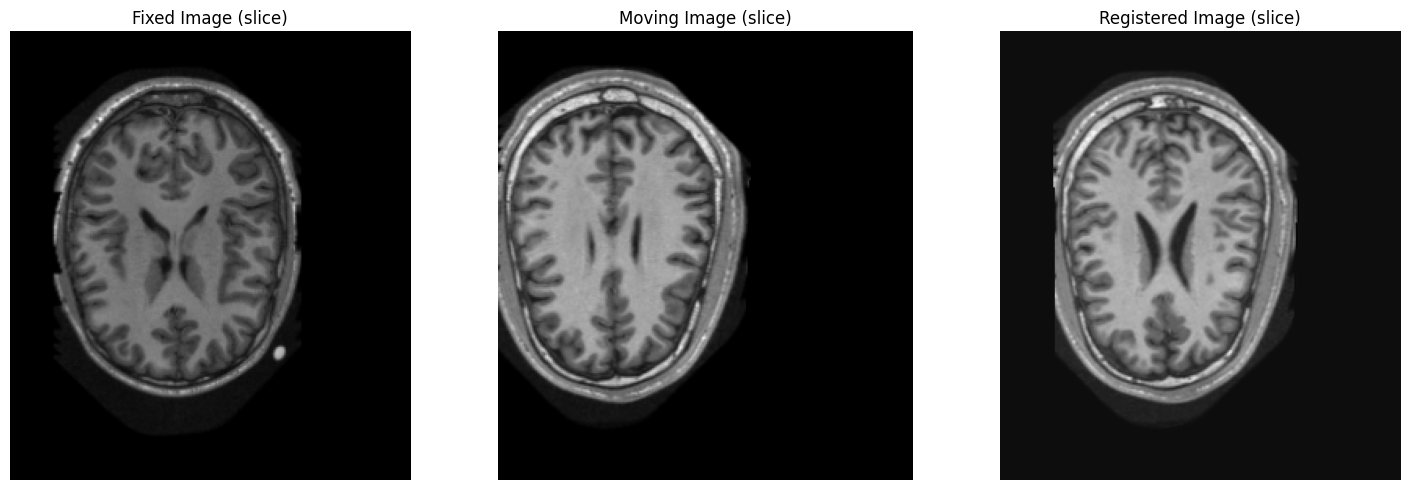

In [ ]:
# Convert ITK images to NumPy arrays for visualization
fixed_array = itk.GetArrayViewFromImage(fixed_image)
moving_array = itk.GetArrayViewFromImage(moving_image)
result_array = itk.GetArrayViewFromImage(result_image)

# Select the middle slice along the z-axis (or any axis of your choice)
slice_index = fixed_array.shape[1] // 2  # middle slice along the third axis

# Visualize the fixed, moving, and registered images side by side (2D slices)
plt.figure(figsize=(15, 5))

# Fixed Image (middle slice)
plt.subplot(1, 3, 1)
plt.imshow(fixed_array[slice_index, :, :], cmap='gray')
plt.title('Fixed Image (slice)')
plt.axis('off')

# Moving Image (middle slice)
plt.subplot(1, 3, 2)
plt.imshow(moving_array[slice_index, :, :], cmap='gray')
plt.title('Moving Image (slice)')
plt.axis('off')

# Registered Image (middle slice)
plt.subplot(1, 3, 3)
plt.imshow(result_array[slice_index, :, :], cmap='gray')
plt.title('Registered Image (slice)')
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Save image with itk
itk.imwrite(result_image,'result_image1.nii')


# BSpline 

In [ ]:
fixed_image = itk.imread('/content/drive/MyDrive/MAIA3/MIRA/training-images/1000.nii')
moving_image = itk.imread('/content/drive/MyDrive/MAIA3/MIRA/training-images/1012.nii')

# Registration parameters
parameter_object = itk.ParameterObject.New()
parameter_map_affine = parameter_object.GetDefaultParameterMap('rigid', 3)
parameter_map_affine['Transform'] = ['AffineTransform']
parameter_map_affine['ResampleInterpolator'] = ['FinalNearestNeighborInterpolator']
parameter_object.AddParameterMap(parameter_map_affine)

resolutions = 3
parameter_map_bspline = parameter_object.GetDefaultParameterMap('bspline', resolutions, 20.0)
parameter_map_bspline['ResampleInterpolator'] = ['FinalNearestNeighborInterpolator']
parameter_map_bspline['Optimizer'] = ['AdaptiveStochasticGradientDescent']
parameter_object.AddParameterMap(parameter_map_bspline)

# Print parameters
print(parameter_object)

ParameterObject (0x5964c115d330)
  RTTI typeinfo:   elastix::ParameterObject
  Reference Count: 1
  Modified Time: 66
  Debug: Off
  Object Name: 
  Observers: 
    none
ParameterMap 0: 
  (AutomaticParameterEstimation "true")
  (AutomaticScalesEstimation "true")
  (CheckNumberOfSamples "true")
  (DefaultPixelValue 0)
  (FinalBSplineInterpolationOrder 3)
  (FixedImagePyramid "FixedSmoothingImagePyramid")
  (ImageSampler "RandomCoordinate")
  (Interpolator "LinearInterpolator")
  (MaximumNumberOfIterations 256)
  (MaximumNumberOfSamplingAttempts 8)
  (Metric "AdvancedMattesMutualInformation")
  (MovingImagePyramid "MovingSmoothingImagePyramid")
  (NewSamplesEveryIteration "true")
  (NumberOfResolutions 3)
  (NumberOfSamplesForExactGradient 4096)
  (NumberOfSpatialSamples 2048)
  (Optimizer "AdaptiveStochasticGradientDescent")
  (Registration "MultiResolutionRegistration")
  (ResampleInterpolator "FinalNearestNeighborInterpolator")
  (Resampler "DefaultResampler")
  (ResultImageFormat "n

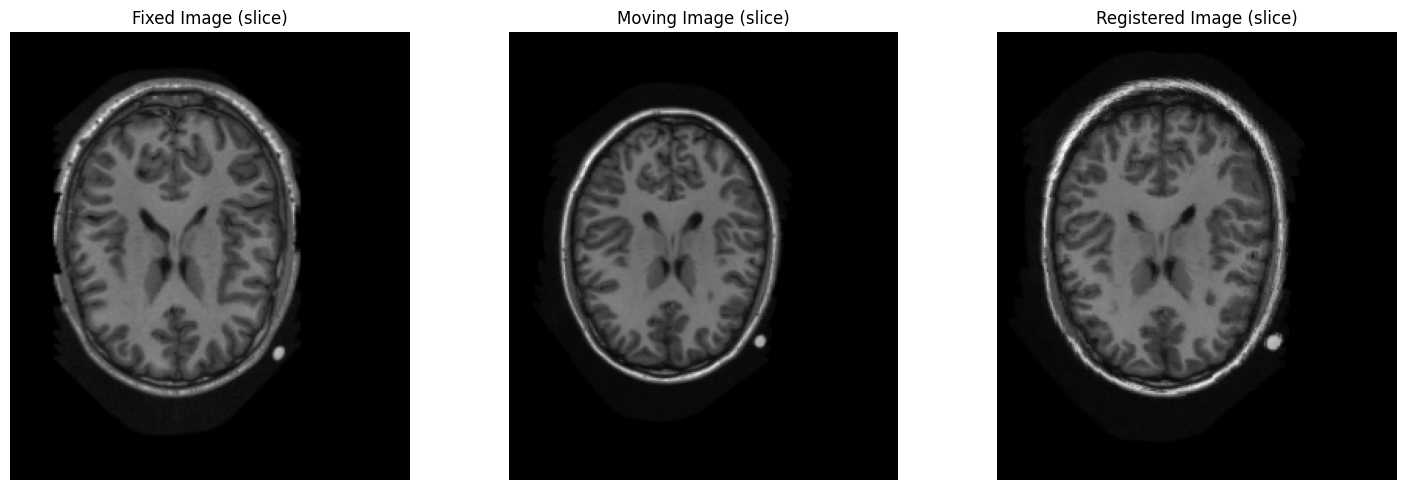

In [ ]:
# Call registration function
result_image, result_transform_parameters = itk.elastix_registration_method(
    fixed_image, moving_image,
    parameter_object=parameter_object,
    log_to_console=True)

# Convert ITK images to NumPy arrays for visualization
fixed_array = itk.GetArrayViewFromImage(fixed_image)
moving_array = itk.GetArrayViewFromImage(moving_image)
result_array = itk.GetArrayViewFromImage(result_image)

# Select the middle slice along the z-axis (or any axis of your choice)
slice_index = fixed_array.shape[1] // 2  # middle slice along the third axis

# Visualize the fixed, moving, and registered images side by side (2D slices)
plt.figure(figsize=(15, 5))

# Fixed Image (middle slice)
plt.subplot(1, 3, 1)
plt.imshow(fixed_array[slice_index, :, :], cmap='gray')
plt.title('Fixed Image (slice)')
plt.axis('off')

# Moving Image (middle slice)
plt.subplot(1, 3, 2)
plt.imshow(moving_array[slice_index, :, :], cmap='gray')
plt.title('Moving Image (slice)')
plt.axis('off')

# Registered Image (middle slice)
plt.subplot(1, 3, 3)
plt.imshow(result_array[slice_index, :, :], cmap='gray')
plt.title('Registered Image (slice)')
plt.axis('off')

plt.tight_layout()
plt.show()

# Transform the labels

### The transform parameters that elastix outputs can be given to transformix as input for the transformations. The output transform parameters from elastix are mappings from the fixed image to the moving image domain. Transformix therefore uses a backwards mapping to obtain a registered version of the moving image (moving -> fixed domain).

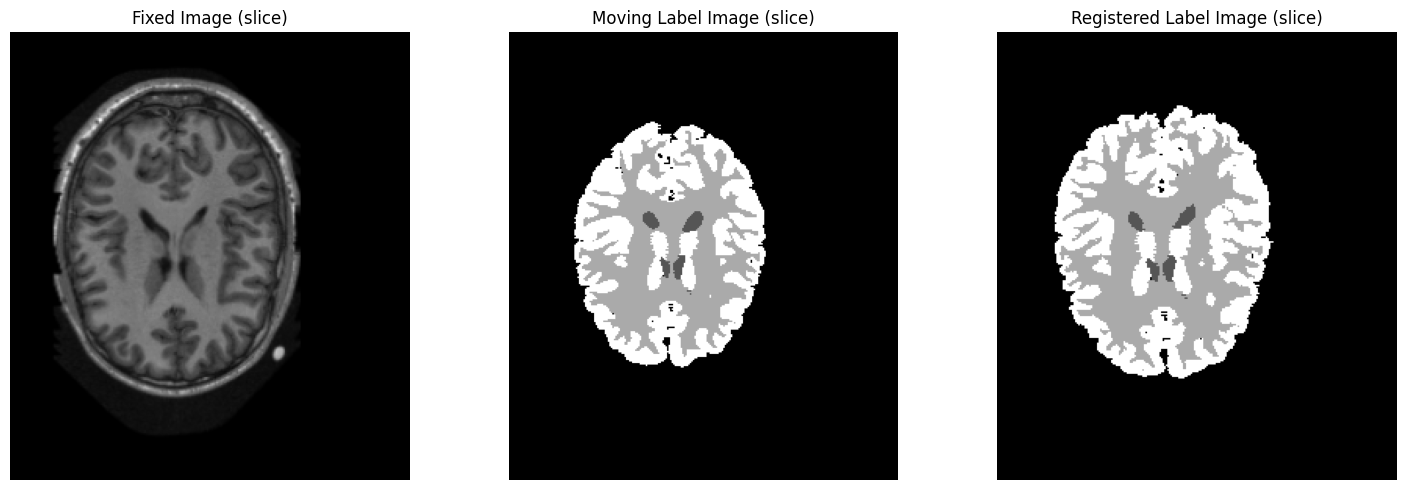

In [ ]:
moving_image_transformix = itk.imread('/content/drive/MyDrive/MAIA3/MIRA/training-labels/1012_3C.nii', itk.F)

result_image_transformix = itk.transformix_filter(
    moving_image_transformix,
    result_transform_parameters)

# Convert ITK images to NumPy arrays for visualization
fixed_array = itk.GetArrayViewFromImage(fixed_image)
moving_array = itk.GetArrayViewFromImage(moving_image_transformix)
result_array = itk.GetArrayViewFromImage(result_image_transformix)

# Select the middle slice along the z-axis (or any axis of your choice)
slice_index = fixed_array.shape[1] // 2  # middle slice along the third axis
fixed_slice = fixed_array[slice_index, :, :]
result_slice = result_array[slice_index, :, :]

# Visualize the fixed, moving, and registered images side by side (2D slices)
plt.figure(figsize=(15, 5))

# Fixed Image (middle slice)
plt.subplot(1, 3, 1)
plt.imshow(fixed_array[slice_index, :, :], cmap='gray')
plt.title('Fixed Image (slice)')
plt.axis('off')

# Moving Image (middle slice)
plt.subplot(1, 3, 2)
plt.imshow(moving_array[slice_index, :, :], cmap='gray')
plt.title('Moving Label Image (slice)')
plt.axis('off')

# Registered Image (middle slice)
plt.subplot(1, 3, 3)
plt.imshow(result_array[slice_index, :, :], cmap='gray')
plt.title('Registered Label Image (slice)')
plt.axis('off')

plt.tight_layout()
plt.show()

# Image registration with masks

In [ ]:
# Load images
fixed_image = itk.imread('/content/drive/MyDrive/MAIA3/MIRA/training-images/1000.nii', itk.F)
moving_image = itk.imread('/content/drive/MyDrive/MAIA3/MIRA/training-images/1002.nii', itk.F)

# Load masks as unsigned char
fixed_mask = itk.imread('/content/drive/MyDrive/MAIA3/MIRA/training-mask/1000_1C.nii', itk.UC)
moving_mask = itk.imread('/content/drive/MyDrive/MAIA3/MIRA/training-mask/1002_1C.nii', itk.UC)


In [ ]:
# Ensure the mask and image dimensions match
print("Fixed Image Shape:", itk.size(fixed_image))
print("Fixed Mask Shape:", itk.size(fixed_mask))
print("Moving Image Shape:", itk.size(moving_image))
print("Moving Mask Shape:", itk.size(moving_mask))

# Convert the fixed mask to the same type as the fixed image (floating-point)
fixed_mask_converted = itk.cast_image_filter(fixed_mask, ttype=(type(fixed_mask), type(fixed_image)))

# Convert the moving mask to the same type as the moving image
moving_mask_converted = itk.cast_image_filter(moving_mask, ttype=(type(moving_mask), type(moving_image)))

Fixed Image Shape: itkSize3 ([256, 287, 256])
Fixed Mask Shape: itkSize3 ([256, 287, 256])
Moving Image Shape: itkSize3 ([256, 277, 256])
Moving Mask Shape: itkSize3 ([256, 277, 256])


In [ ]:
# Transformation parameters
parameter_object = itk.ParameterObject.New()
resolutions = 3
parameter_map_rigid = parameter_object.GetDefaultParameterMap('rigid',3)
parameter_map_rigid['ErodeMask'] = ['True']
parameter_object.AddParameterMap(parameter_map_rigid)
print(parameter_object)

# Load Elastix Image Filter Object
# Fixed and moving image should be given to the Elastix method to ensure that
elastix_object = itk.ElastixRegistrationMethod.New(fixed_image, moving_image)
elastix_object.SetFixedMask(fixed_mask)
elastix_object.SetMovingMask(moving_mask)
elastix_object.SetParameterObject(parameter_object)

# Set additional options
elastix_object.SetLogToConsole(False)

# Update filter object (required)
elastix_object.UpdateLargestPossibleRegion()

# Results of Registration
result_image = elastix_object.GetOutput()
result_transform_parameters = elastix_object.GetTransformParameterObject()

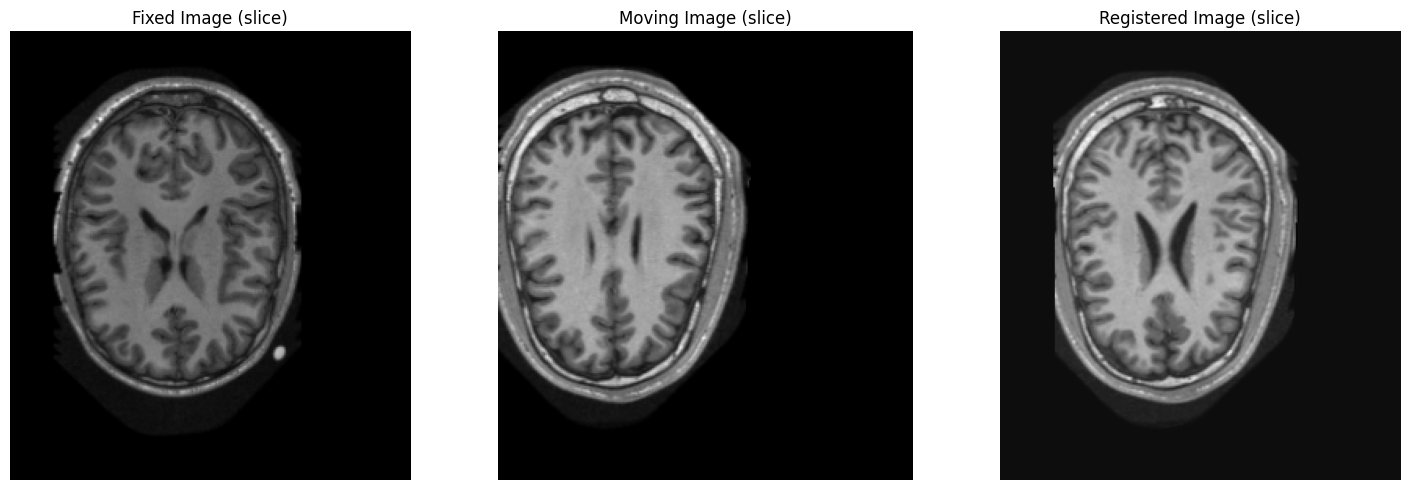

In [ ]:
# Convert ITK images to NumPy arrays for visualization
fixed_array = itk.GetArrayViewFromImage(fixed_image)
moving_array = itk.GetArrayViewFromImage(moving_image)
result_array = itk.GetArrayViewFromImage(result_image)

# Select the middle slice along the z-axis (or any axis of your choice)
slice_index = fixed_array.shape[1] // 2  # middle slice along the third axis

# Visualize the fixed, moving, and registered images side by side (2D slices)
plt.figure(figsize=(15, 5))

# Fixed Image (middle slice)
plt.subplot(1, 3, 1)
plt.imshow(fixed_array[slice_index, :, :], cmap='gray')
plt.title('Fixed Image (slice)')
plt.axis('off')

# Moving Image (middle slice)
plt.subplot(1, 3, 2)
plt.imshow(moving_array[slice_index, :, :], cmap='gray')
plt.title('Moving Image (slice)')
plt.axis('off')

# Registered Image (middle slice)
plt.subplot(1, 3, 3)
plt.imshow(result_array[slice_index, :, :], cmap='gray')
plt.title('Registered Image (slice)')
plt.axis('off')

plt.tight_layout()
plt.show()

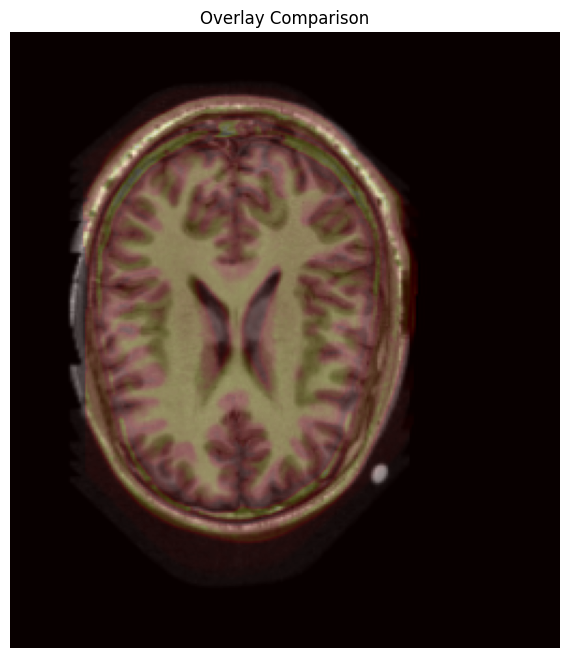

In [ ]:
# Compare the fixed and registered images
alpha = 0.2  # Transparency level

plt.figure(figsize=(8, 8))
plt.imshow(fixed_slice, cmap='gray')
plt.imshow(result_slice, cmap='hot', alpha=alpha)  # Overlay result with transparency
plt.title('Overlay Comparison')
plt.axis('off')
plt.show()

## More Examples

In [ ]:
moving_image1 = itk.imread('/content/drive/MyDrive/MAIA3/MIRA/training-images/1001.nii', itk.F)
moving_image2 = itk.imread('/content/drive/MyDrive/MAIA3/MIRA/training-images/1006.nii', itk.F)
moving_image3 = itk.imread('/content/drive/MyDrive/MAIA3/MIRA/training-images/1007.nii', itk.F)

### Image Registration 

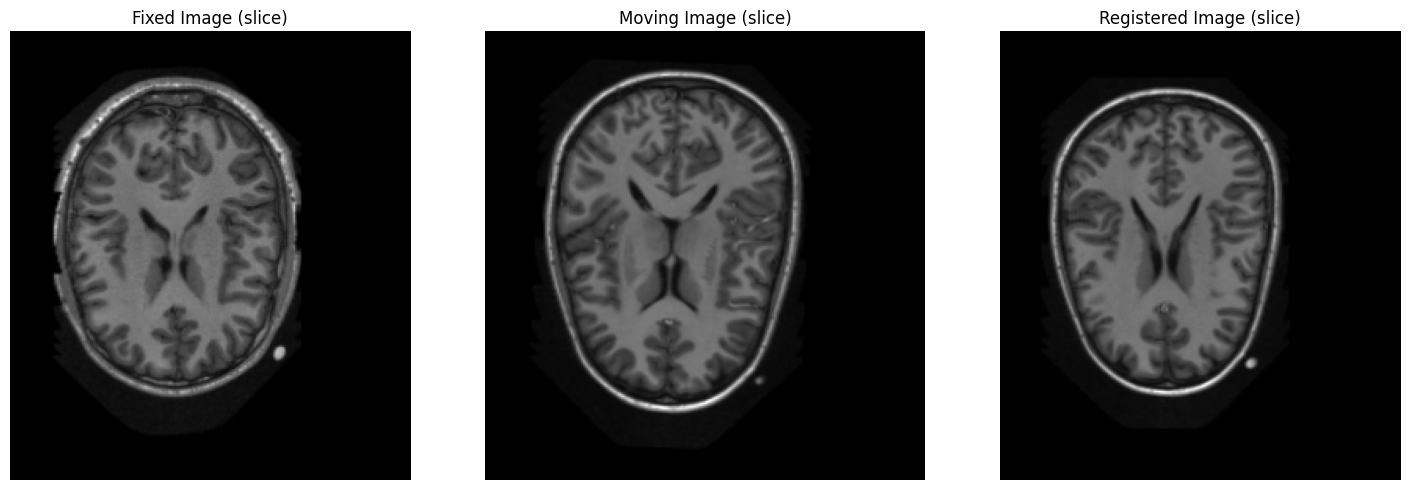

In [ ]:
# Transformation parameters
parameter_object = itk.ParameterObject.New()
resolutions = 3
parameter_map_rigid = parameter_object.GetDefaultParameterMap('rigid',3)
parameter_map_rigid['ErodeMask'] = ['True']
parameter_object.AddParameterMap(parameter_map_rigid)

# Call registration function
result_image, result_transform_parameters = itk.elastix_registration_method(
    fixed_image, moving_image1,
    parameter_object=parameter_object,
    log_to_console=False)

# Convert ITK images to NumPy arrays for visualization
fixed_array = itk.GetArrayViewFromImage(fixed_image)
moving_array = itk.GetArrayViewFromImage(moving_image1)
result_array = itk.GetArrayViewFromImage(result_image)

# Select the middle slice along the z-axis (or any axis of your choice)
slice_index = fixed_array.shape[1] // 2  # middle slice along the third axis
fixed_slice = fixed_array[slice_index, :, :]
result_slice = result_array[slice_index, :, :]

# Visualize the fixed, moving, and registered images side by side (2D slices)
plt.figure(figsize=(15, 5))

# Fixed Image (middle slice)
plt.subplot(1, 3, 1)
plt.imshow(fixed_array[slice_index, :, :], cmap='gray')
plt.title('Fixed Image (slice)')
plt.axis('off')

# Moving Image (middle slice)
plt.subplot(1, 3, 2)
plt.imshow(moving_array[slice_index, :, :], cmap='gray')
plt.title('Moving Image (slice)')
plt.axis('off')

# Registered Image (middle slice)
plt.subplot(1, 3, 3)
plt.imshow(result_array[slice_index, :, :], cmap='gray')
plt.title('Registered Image (slice)')
plt.axis('off')

plt.tight_layout()
plt.show()

### Labels Transformation

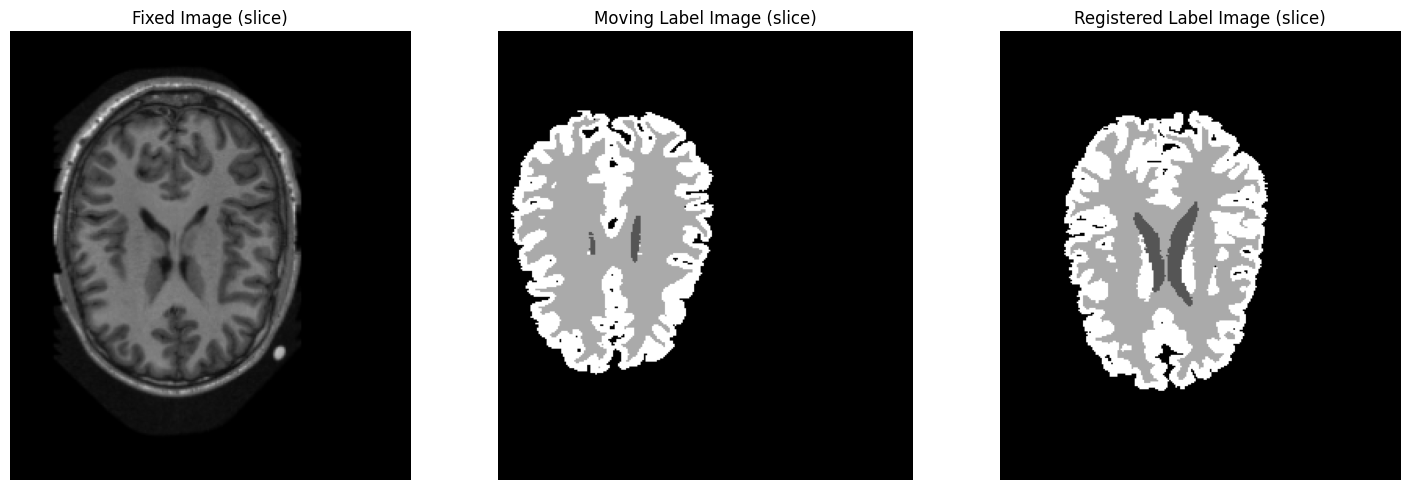

In [ ]:
# Import labels of the last registered image
moving_image_transformix = itk.imread('/content/drive/MyDrive/MAIA3/MIRA/training-labels/1002_3C.nii', itk.F)

# Perform transformation of labels using the registration parameters
result_image_transformix = itk.transformix_filter(
    moving_image_transformix,
    result_transform_parameters)

# Convert ITK images to NumPy arrays for visualization
fixed_array = itk.GetArrayViewFromImage(fixed_image)
moving_array = itk.GetArrayViewFromImage(moving_image_transformix)
result_array = itk.GetArrayViewFromImage(result_image_transformix)

# Select the middle slice along the y-axis (or any axis of your choice)
slice_index = fixed_array.shape[1] // 2  # middle slice along the second axis
fixed_slice = fixed_array[slice_index, :, :]
result_slice = result_array[slice_index, :, :]

# Visualize the fixed, moving, and registered images side by side (2D slices)
plt.figure(figsize=(15, 5))

# Fixed Image (middle slice)
plt.subplot(1, 3, 1)
plt.imshow(fixed_array[slice_index, :, :], cmap='gray')
plt.title('Fixed Image (slice)')
plt.axis('off')

# Moving Image (middle slice)
plt.subplot(1, 3, 2)
plt.imshow(moving_array[slice_index, :, :], cmap='gray')
plt.title('Moving Label Image (slice)')
plt.axis('off')

# Registered Image (middle slice)
plt.subplot(1, 3, 3)
plt.imshow(result_array[slice_index, :, :], cmap='gray')
plt.title('Registered Label Image (slice)')
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Save label image with itk
itk.imwrite(result_image_transformix,'result_label1002.nii')